In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
%matplotlib inline

# 선형회귀(Linear Regression)
먼저, 주어진 데이터를 직선을 사용해 모델링하는 방법을 살펴본다. 직선함수는 다음과 같은 형태를 가진다.
                            y = ax + b
여기서 a는 기울기고 b는 y절편이다.
아래 그래프는 기울기가 2이고 y절편이 -5인 직선으로부터 생성된 데이터를 보여준다.

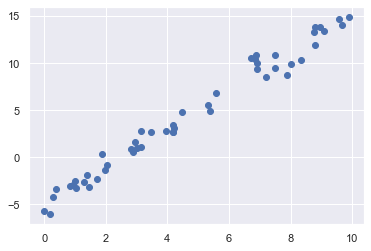

In [12]:
rng = np.random.RandomState(1)#0~1사이의 수 생성
x = 10 * rng.rand(50)#0~1사이의 수 50개를 생성
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Scikit-Learn의 `LinearRegresstion` estimator를 사용해서 위 데이터를 가장 잘 표현하는 직선을 찾을 수 있다.

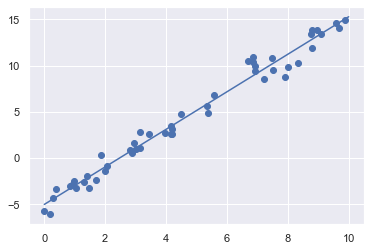

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [16]:
x[:3, np.newaxis]#x와 달리 차원을 늘려 포맷을 맞춰줌(3개만 출력)

array([[4.17022005e+00],
       [7.20324493e+00],
       [1.14374817e-03]])

모델 학습이 끝난 후 학습된 파라미터들은 model."파라미터이름"_의 형태로 저장된다. 기울기와 y절편은 아래와 같이 출력할 수 있다.

In [17]:
print("Model slope    :", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope    : 2.0272088103606944
Model intercept: -4.9985770855532


`LinearRegression` estimator는 위의 예제와 같은 1차원 입력뿐만 아니라 다차원 입력을 사용한 선형모델을 다룰 수 있다. 다차원 선형모델은 다음과 같은 형태를 가진다.
                        y = a0 + a1x1 + a2x2 + ...
기하학적으로 이것은 hyper-plane으로 데이터를 표현하는 것이라고 말할 수 있다.

In [18]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(100, 3)#100개의 열, 3개의 행을 갖도록 총 300개의 숫자 생성
y = 0.5 + np.dot(x, [1.5, -2., 1.])#100, 3 행렬과 3, 1행렬의 곱으로 인해 100, 1인 행렬 생성(y)

model.fit(x, y)
print(model.intercept_)
print(model.coef_)

0.50000000000001
[ 1.5 -2.   1. ]


In [19]:
x[:5]

array([[4.17022005e+00, 7.20324493e+00, 1.14374817e-03],
       [3.02332573e+00, 1.46755891e+00, 9.23385948e-01],
       [1.86260211e+00, 3.45560727e+00, 3.96767474e+00],
       [5.38816734e+00, 4.19194514e+00, 6.85219500e+00],
       [2.04452250e+00, 8.78117436e+00, 2.73875932e-01]])

In [20]:
y[:5]

array([ -7.65001605,   3.02325672,   0.35036337,   7.05055573,
       -13.72168905])

y값들은 랜덤하게 생성된 3차원의 x값과 계수들([1.5, -2, 1])을 곱함으로써 생성되었는데, linear regression을 통해서 이 계수들을 계산해낼 수 있다는 것을 알 수 있다.

만약 데이터가 선형적인 관계를 가지고 있지 않다면?

# 선형 기저함수 모델(Linear Basis Function Models)
비선형데이터를 선형함수로 모델링하는 한가지 방법은 기저함수(basis function)을 사용하는 것이다.

예를 들어, 다음과 같은 선형함수를 사용한다고 하자.
                y = a0 + a1x1 + a2x2 + a3x3 + ...
여기서 x1, x2, x3등을 1차원 x로부터 생성할 수 있다.(x<sub>n</sub> = f<sub>n</sub>(x)). f<sub>n</sub>을 기저함수(basis function)라고 부른다.

만약 f<sub>n</sub>(x) = x<sup>n</sup>라는 기저함수를 사용하면 최종적인 모델은 다음과 같을 것이다.
                y = a0 + a1x + a2x<sup>2</sup> + a3x<sup>3</sup> + ...
                
이 모델은 여전히 계수(an)에 관해서는 선형함수임을 기억하자. 따라서 1차원 변수인 x를 기저함수를 통해 다차원으로 확장시킴으로써 우리는 여전히 선형모델(linear regression)을 사용할 수 있게 된다.

# 다항 기저함수(Polyunomial Basis Functions)
f<sub>n</sub>(x) = x<sup>n</sup> 형태의 함수를 다항 기저함수라고 부른다. Scikit-Learn은 `polynomialFeatures`이라는 transformer를 이미 포함하고 있다.

In [27]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

PolynomialFeatures가 1차원 array를 3차원 array로 변환한 것을 볼 수 있다. 이렇게 변환된 데이터를 선형모델에 적용할 수 있다.

7차원 변환을 적용해보자.

In [22]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                          LinearRegression())

다차원 변환을 사용하면 복잡한 데이터를 모델링할 수 있게 된다. 예를 들어 sine 함수를 사용해서 데이터를 생성하고 모델링해보자.

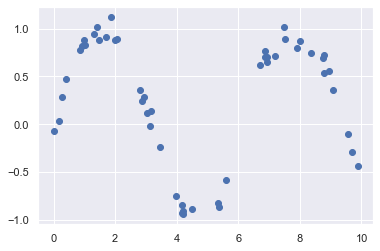

In [23]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
plt.scatter(x, y)

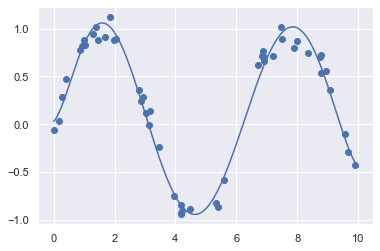

In [24]:
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

# 가우시안 기저함수(Gaussian Basis Functions)
다항 기저함수 외에 다른 기저함수를 사용해보자. 가우시안 기저함수는 다음과 같이 정의된다.
                exp{-(x - u<sub>j</sub>)<sup>2</sup> / 2s<sup>2</sup>)}
                
u<sub>j</sub>는 함수의 위치, s는 폭을 결정한다. 주어진 데이터를 여러 개의 가우시안 기저함수들의 합으로 표현하려고 시도할 수 있다.

# 규제화(Regularization)
기저함수를 사용함으로써 복잡한 데이터를 모델링할 수 있게 되었지만 조심하지 않는다면 over-fitting이라는 다른 심각한 문제를 만날 수 있따. 예를 들어, 너무 많은 개수의 가우시안 기저함수를 사용하게 되면 다음과 같이 될 수 있다.

![image](https://user-images.githubusercontent.com/60081212/120269081-0f4c7b00-c2e2-11eb-9d08-36198869e674.png)

![image](https://user-images.githubusercontent.com/60081212/120269220-59cdf780-c2e2-11eb-8f8a-e582634c9e6a.png)

위 두번째 그래프는 각각의 가우시안 기저함수의 크기(계수값)을 보여주고 있다. Over-fitting이 일어난 영역에서는 인접한 기저함수들의 값이 극단으로 가면서 서로 상쇄하는 현상이 일어난다. 따라서 큰 계수값에 대해 penalty를 부여해서 Over-fitting을 어느 정도 극복할 수 있을 것이다. 이러한 penalty를 regularization이라 부른다.

## Ridge regression(L<sub>2</sub> Regularization)
가장 자주 쓰이는 형태의 regularization은 ridge regresstion (L<sub>2</sub> Regularization)이고 다음과 같이 정의된다.
            ![image](https://user-images.githubusercontent.com/60081212/120269332-913ca400-c2e2-11eb-950e-65f5ac432afe.png)

여기서 α는 regularization의 강도를 조절하는 파라미터이다. 이 형태의 regularization은 Scikit-Learn의 `Ridge` estimator에서 사용된다.

![image](https://user-images.githubusercontent.com/60081212/120269442-cea13180-c2e2-11eb-9f61-e42cacb3b4c6.png)

## Lasso regression (L<sub>1</sub> Regularization)
또 하나의 자주 쓰이는 regularization방법은 계수들의 절대값의 합을 제한하는 것이다.
                ![image](https://user-images.githubusercontent.com/60081212/120269547-014b2a00-c2e3-11eb-85c5-073830bd7080.png)
뒤에서 자세히 다루겠지만 이 방법은 sparse한 모델을 생성하게 된다(많은 계수들이 0이 됨).

![image](https://user-images.githubusercontent.com/60081212/120269686-41121180-c2e3-11eb-94a1-d73041aafffd.png)

위에서 볼 수 있듯 대부분의 계수값을이 0이 된다. Ridge regression과 마찬가지로 α값으로 regularization의 강도를 조절할 수 있다.

## SGD

max_iter = 20일 때
![image](https://user-images.githubusercontent.com/60081212/120269784-70288300-c2e3-11eb-919e-3adf00a670df.png)

max_iter가 100일 때
![image](https://user-images.githubusercontent.com/60081212/120269836-88989d80-c2e3-11eb-9275-01abc13e36e4.png)

max_iter가 1000일 때
![image](https://user-images.githubusercontent.com/60081212/120269956-bb429600-c2e3-11eb-8605-52839ab49625.png)